# 선박입출항관련 변수 찾기

In [10]:

# !pip install seaborn 
# !pip install matplotlib 
# !pip install pandas
# !pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 71.7/250.0 kB 491.5 kB/s eta 0:00:01
     ---------------- ------------------- 112.6/250.0 kB 652.2 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.0 kB 655.8 kB/s eta 0:00:01
     ------------------------- ---------- 174.1/250.0 kB 655.4 kB/s eta 0:00:01
     ----------------------------- ------ 204.8/250.0 kB 655.1 kB/s eta 0:00:01
     -----------------------------------  245.8/250.0 kB 628.1 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 613.2 kB/s eta 0:00:00


# 1. 데이터셋 불러오기

### 선박입출항 데이터셋 읽기

In [1]:
import pandas as pd


df = pd.read_excel('./ship_20231012.xlsx', skiprows=[0,1,2])

df.columns = ['조회년도', '조회월', '총계_척수', '총계_톤수', 
              '입항_계_척수', '입항_계_톤수', '입항_외항_척수', '입항_외항_톤수', '입항_내항_척수', '입항_내항_톤수', 
              '출항_계_척수', '출항_계_톤수', '출항_외항_척수', '출항_외항_톤수', '출항_내항_척수', '출항_내항_톤수']
df = df.ffill()
df = df[df['조회월']!='소계']
df['period'] = df['조회년도'].str.replace("년",'') + df['조회월'].str.replace('월','')
df = df[['period', '입항_계_척수', '출항_계_척수']]
df.columns = ['period', 'arr', 'dep']
df['period'] = pd.to_numeric(df['period'])
df_ship = df[df["period"] > 202107]
# df_ship['period'] = pd.to_datetime(df_ship['period'], format='%Y%m')
df_ship.set_index(df_ship['period'], inplace=True)
# df_ship = df_ship.resample('M').mean()

print(df_ship)

        period   arr   dep
period                    
202108  202108  1298  1290
202109  202109  1226  1233
202110  202110  1345  1334
202111  202111  1274  1257
202112  202112  1292  1315
202201  202201  1248  1234
202202  202202  1058  1065
202203  202203  1396  1397
202204  202204  1293  1304
202205  202205  1377  1380
202206  202206  1246  1228
202207  202207  1351  1348
202208  202208  1207  1229
202209  202209  1242  1235
202210  202210  1148  1151
202211  202211  1153  1149
202212  202212  1127  1123
202301  202301  1045  1036
202302  202302  1043  1050
202303  202303  1166  1176
202304  202304  1119  1108
202305  202305  1215  1218
202306  202306  1174  1196
202307  202307  1207  1207
202308  202308  1152  1154


c:\Users\winmev\anaconda3\envs\pytest\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### 미국 기준 금리 데이터셋 읽기


In [2]:
import numpy as np

df = pd.read_csv('./FRB_PRATES.csv', skiprows=5)
df.columns = ['period', 'RESBME', 'ESBMS', 'RESBM']
df["period"] = df['period'].astype(str).str.replace('-', '')
df["period"] = df['period'].astype(int)

df['period'] = pd.to_datetime(df['period'], format='%Y%m%d')

df.set_index(df['period'], inplace=True)
df = df.resample('M').mean()

df["period"] = df.index
df["period"] = df['period'].astype(str).str.replace('-', '')
df["period"] = df['period'].astype(str).str[:6]
df['period'] = pd.to_numeric(df['period'])
df = df[df["period"] > 202107]
df_us_ir = df[df["period"] < 202309]
df_us_ir.set_index(df_us_ir['period'], inplace=True)

print(df_us_ir)

        period  RESBME  ESBMS     RESBM
period                                 
202108  202108     NaN    NaN  0.150000
202109  202109     NaN    NaN  0.150000
202110  202110     NaN    NaN  0.150000
202111  202111     NaN    NaN  0.150000
202112  202112     NaN    NaN  0.150000
202201  202201     NaN    NaN  0.150000
202202  202202     NaN    NaN  0.150000
202203  202203     NaN    NaN  0.270968
202204  202204     NaN    NaN  0.400000
202205  202205     NaN    NaN  0.835484
202206  202206     NaN    NaN  1.275000
202207  202207     NaN    NaN  1.746774
202208  202208     NaN    NaN  2.400000
202209  202209     NaN    NaN  2.625000
202210  202210     NaN    NaN  3.150000
202211  202211     NaN    NaN  3.850000
202212  202212     NaN    NaN  4.174194
202301  202301     NaN    NaN  4.400000
202302  202302     NaN    NaN  4.641071
202303  202303     NaN    NaN  4.722581
202304  202304     NaN    NaN  4.900000
202305  202305     NaN    NaN  5.125806
202306  202306     NaN    NaN  5.150000


In [3]:
df = pd.concat([df_ship, df_us_ir], axis=1)
# df_new.reset_index(drop=False)
print(df)

        period   arr   dep  period  RESBME  ESBMS     RESBM
period                                                     
202108  202108  1298  1290  202108     NaN    NaN  0.150000
202109  202109  1226  1233  202109     NaN    NaN  0.150000
202110  202110  1345  1334  202110     NaN    NaN  0.150000
202111  202111  1274  1257  202111     NaN    NaN  0.150000
202112  202112  1292  1315  202112     NaN    NaN  0.150000
202201  202201  1248  1234  202201     NaN    NaN  0.150000
202202  202202  1058  1065  202202     NaN    NaN  0.150000
202203  202203  1396  1397  202203     NaN    NaN  0.270968
202204  202204  1293  1304  202204     NaN    NaN  0.400000
202205  202205  1377  1380  202205     NaN    NaN  0.835484
202206  202206  1246  1228  202206     NaN    NaN  1.275000
202207  202207  1351  1348  202207     NaN    NaN  1.746774
202208  202208  1207  1229  202208     NaN    NaN  2.400000
202209  202209  1242  1235  202209     NaN    NaN  2.625000
202210  202210  1148  1151  202210     N

## 데이터셋의 중요 특징을 시각화하기

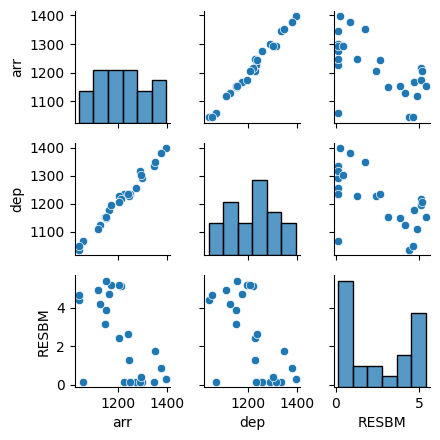

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 행렬로 각 특성간의 상관관계를 한 번에 시각화
cols = ['arr', 'dep', 'RESBM']

sns.pairplot(df[cols], height=1.5)
plt.tight_layout()
plt.show()


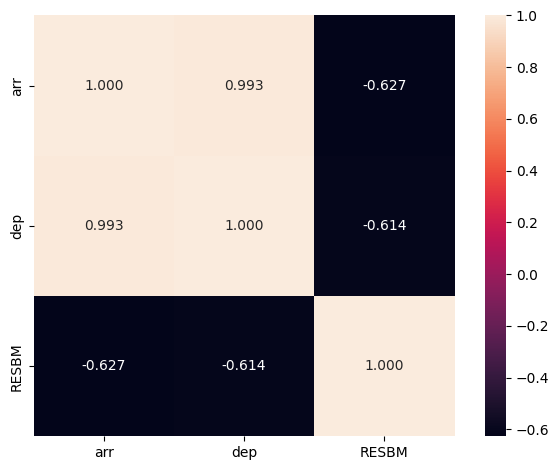

In [9]:
import numpy as np

# 상관관계 행렬을 히트맵으로 표현
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.3f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()